# 파이썬을 이용한 시계열 분석 - 예제와 함께하는 포괄적인 가이드

[Time Series Analysis in Python – A Comprehensive Guide with Examples](https://www.machinelearningplus.com/time-series/time-series-analysis-python/)

<br>

*시계열(Time series)은 일정한 시간 간격으로 기록된 관측의 순서다. 이 가이드는 파이썬으로 주어진 시계열의 특성을 분석하는 과정을 안내한다.*

<brR>

## 목차

1. [시계열이란 무엇인가?](#1)
2. [파이썬에서 시계열 데이터를 어떻게 불러오는가?](#2)
3. [panel 데이터란 무엇인가?](#3)
4. [시계열 시각화](#4)
5. [시계열의 패턴](#5)
6. [시계열 데이터 더하기 및 곱하기](#6)
7. [시계열을 구성요소(components)로 분해(decompose)하는 방법](#7)
8. [정상(stationary) & 비정상(non-stationary) 시계열](#8)
9. [정상 시계열 만드는 방법](#9)
10. [정상성을 검정하는 방법](#10)
11. [백색잡음(white noise)과 정상 시계열의 차이점](#11)
12. [시계열에서 추세 제거(detrend)하는 방법](#12)
13. [시계열에서 계절성 제거(deseasonalize)하는 방법](#13)
14. [시계열의 계절성을 검정하는 방법](#14)
15. [시계열 데이터의 결측값 다루는 방법](#15)
16. [자기상관함수(autocorrelation function)와 부분자기상관함수(partial autocorrelation function)](#16)
17. [부분자기상관함수 계산하는 방법](#17)
18. [Lag 그래프](#18)
19. [시계열의 예측가능성(forecastability)을 제거하는 방법](#19)
20. [시계열을 평활화(smoothen)하는 이유와 방법](#20)
21. [한 시계열이 다른 시계열을 예측하는 데 도움이 되는 지 확인하기 위해 그래인저 인과관계(Granger Causality) 검정을 하는 방법](#21)
22. [다음은 무엇인가?](#22)

<br>
<a id="1"></a>

# 1. 시계열이란 무엇인가?

시계열(Time series)은 일정한 시간 간격으로 기록된 관측의 순서다.  
  
  
관측 빈도에 따라 시계열은 일반적으로 매시간, 일, 주, 월, 분기 및 연간이 될 수 있다. 클릭 횟수나 분당 사용자 방문 등 초 및 분 단위 시계열도 있을 수 있다.  
  
  
왜 시계열 분석을 하는 것일까?  
  
  
왜냐하면 그것은 시리즈(series) 예측을 개발하기 전의 준비 단계(preparatory)이기 때문이다.  
  
  
게다가 시계열 예측은 수요와 판매, 웹사이트 방문자 수, 주가 등과 같은 사업에 중요한 것들이 본질적으로 시계열 데이터이기 때문에 엄청난 상업적 의미를 가진다.  
  
  
그렇다면 시계열 분석에는 어떤 것이 포함되는가?  
  
  
시계열 분석에는 시리즈 고유의 특성에 대한 다양한 측면을 이해하여 의미 있고 정확한 예측을 작성하는 데 더 많은 정보를 얻을 수 있도록 해야 한다.

<br>
<a id="2"></a>

# 2. 파이썬에서 시계열 데이터를 어떻게 불러오는가?

시계열 데이터를 어떻게 불러올까?  
  
  
시계열의 데이터는 일반적으로 `.csv` 파일 또는 다른 스프레드시트 형식으로 저장되며 날짜와 측정값의 두 열을 포함한다.  
  
  
pandas 패키지의 `read_csv()`를 사용하여 시계열 데이터 세트(호주 의약품 판매에 대한 csv 파일)를 pandas 데이터프레임으로 읽어보자. `parse_dates=['date']` 인자를 추가하면 날짜 열이 `date` 필드로 지정된다.

In [1]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10,7), 'figure.dpi': 120})

In [2]:
# Import as Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


다른 방법으로, `date`를 인덱스로 갖는 pandas 시리즈로 임포트할 수도 있다. `pd.read_csv()`에 `index_col` 인자를 명시하면 된다.

In [3]:
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                   parse_dates=['date'],
                   index_col='date'
                 )
ser.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


시리즈에서는 이것이 시리즈임을 암시하기 위해 'value' 컬럼이 'date' 보다 높게 위치한다.

<br>
<a id="3"></a>

# 3. panel 데이터란 무엇인가?

panel 데이터도 시간 기반의 데이터셋이다.  
  
  
차이점은 시계열 외에도 같은 시간 동안 측정된 하나 이상의 관련 변수를 포함하고 있다는 것이다.  
  
  
일반적으로 패널 데이터 안에 있는 컬럼들은 Y를 예측하는 데 도움이되는 설명 변수들을 포함하고, 이러한 컬럼들은 미래 예측 기간으로 이용된다.  
  
  
패널 데이터의 예는 다음과 같다.

In [4]:
# dataset source: https://github.com/rouseguy
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df = df.loc[df.market == 'MUMBAI', :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


<br>
<a id="4"></a>

# 4. 시계열 시각화

`matplotlib` 을 이용하여 시리즈를 시각화해보자.

In [5]:
# Time series data source: fpp package in R.
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 parse_dates=['date'],
                 index_col='date')

In [6]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [7]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100) :
    
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


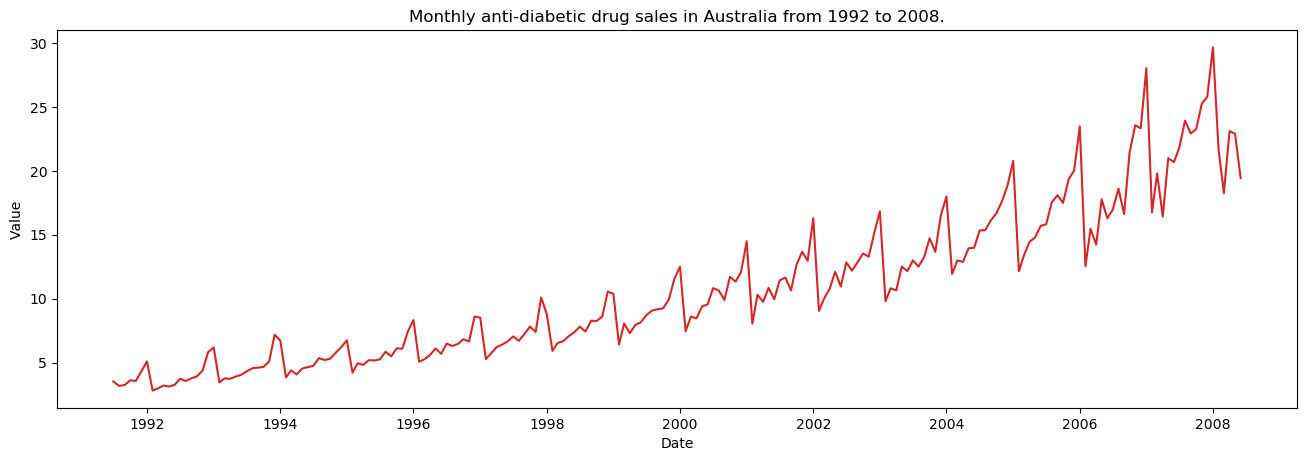

In [8]:
plot_df(df, 
        x=df.index, 
        y=df.value, 
        title="Monthly anti-diabetic drug sales in Australia from 1992 to 2008.")

모든 값들이 양수이기 때문에 당신은 Y축 양쪽으로 성장을 강조하는 모습을 볼 수 있다.

In [9]:
# Import data
df = pd.read_csv('datasets/AirPassengers.csv', parse_dates=['Month'])
x = df['Month'].values
y1 = df['#Passengers'].values

df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


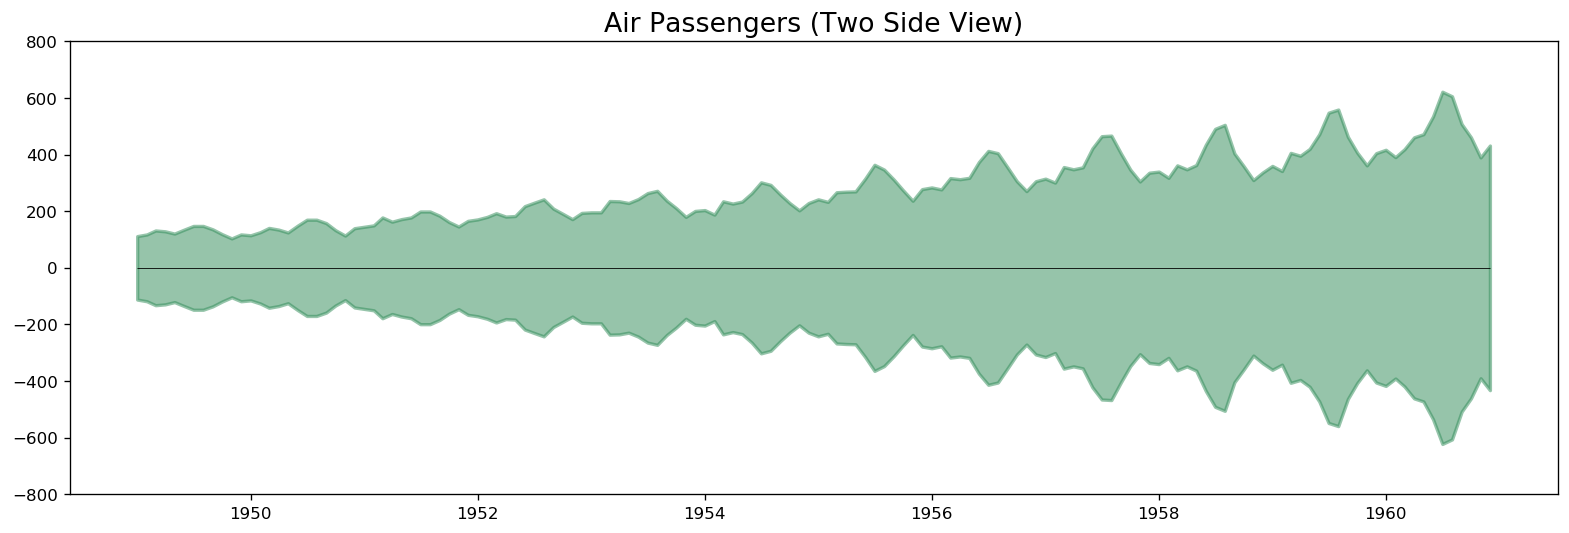

In [10]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(16, 5), dpi=120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.Month), xmax=np.max(df.Month), linewidth=.5)
plt.show()

이것이 월별 시계열이고 매년 일정한 반복 패턴을 나타내므로, 매년을 같은 플롯에 분리하여 그릴 수 있다. 이는 연도별 타당한 패턴을 나란히 비교할 수 있다.

<br>

## 4.1 시계열의 Seaborn Plot 

In [11]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [12]:
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()
years

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

In [13]:
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()),
                            len(years),
                            replace=False)
mycolors

array(['xkcd:vivid purple', 'xkcd:bright lavender', 'xkcd:sapphire',
       'xkcd:dark fuchsia', 'xkcd:dusky pink', 'xkcd:dusty purple',
       'xkcd:dark tan', 'xkcd:orange brown', 'xkcd:red orange',
       'xkcd:clear blue', 'xkcd:lemon', 'xkcd:bluish grey',
       'xkcd:dark blue grey', 'xkcd:pale violet', 'xkcd:orangey yellow',
       'xkcd:cool grey', 'xkcd:green', 'xkcd:ice'], dtype='<U31')

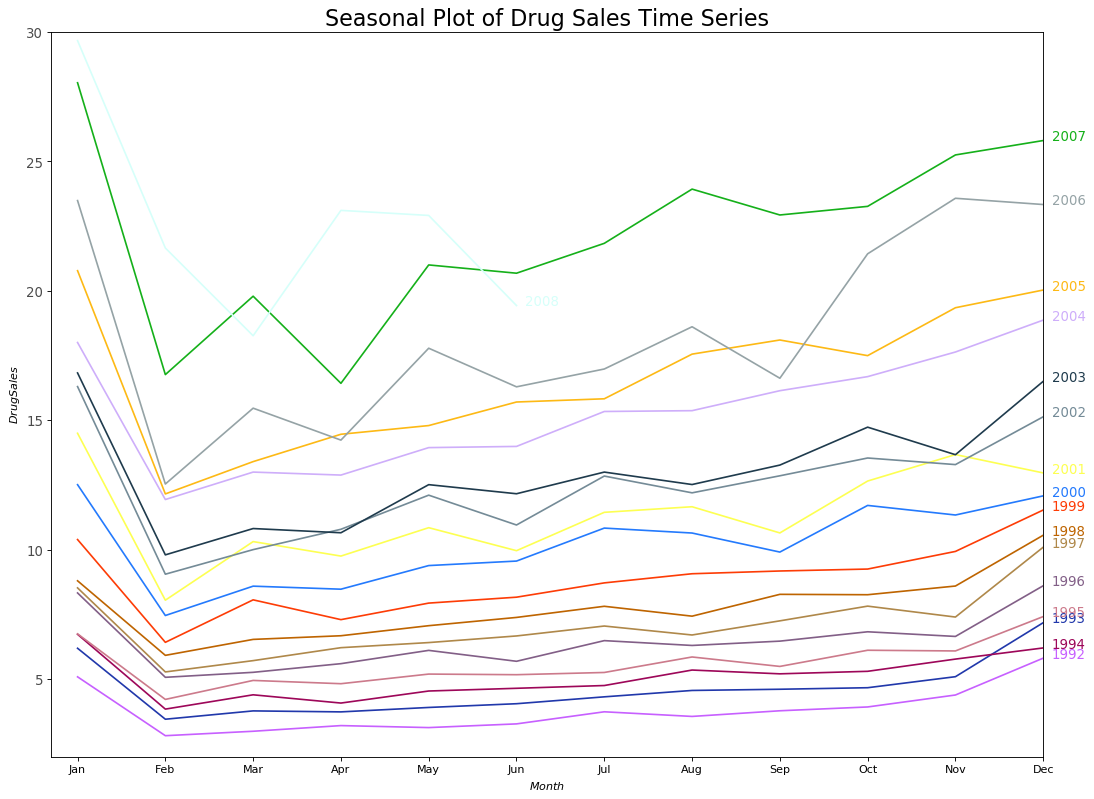

In [14]:
# Draw Plot
plt.figure(figsize=(16,12), dpi=80)

for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 'value', data=df.loc[df.year == y, :],
                 color=mycolors[i], label=y)
        plt.text(df.loc[df.year == y, :].shape[0]-.9,
                 df.loc[df.year == y, 'value'][-1:].values[0],
                 y,
                 fontsize=12, color=mycolors[i])
        
# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30),
              ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

매년 2월이면 마약 판매량이 급감해 3월에 다시 상승하고 4월에 다시 하락하고 있다. 분명히 이 패턴은 매년 일정하게 반복된다.

하지만, 세월이 흐르면서 마약 판매는 전반적으로 증가한다. 이러한 마약 판매의 트렌드와 연도별로 어떻게 변화하는 지를 멋진 연단위로 잘 시각화할 수 있다. 마찬가지로 월별 분포를 시각화하기 위해 한 달 단위로 box plot을 그릴 수 있다.

<br>

## 4.2 월별(계절성) 그리고 년도별(트렌트) 분포의 Boxplot

계절 간격으로 데이터를 그룹화하여 해당 연도 또는 월별로 데이터가 어떻게 분포되는 지, 시간에 따라 비교를 할 수 있다.

In [15]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

In [16]:
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime("%b") for d in df.date]
years = df['year'].unique()

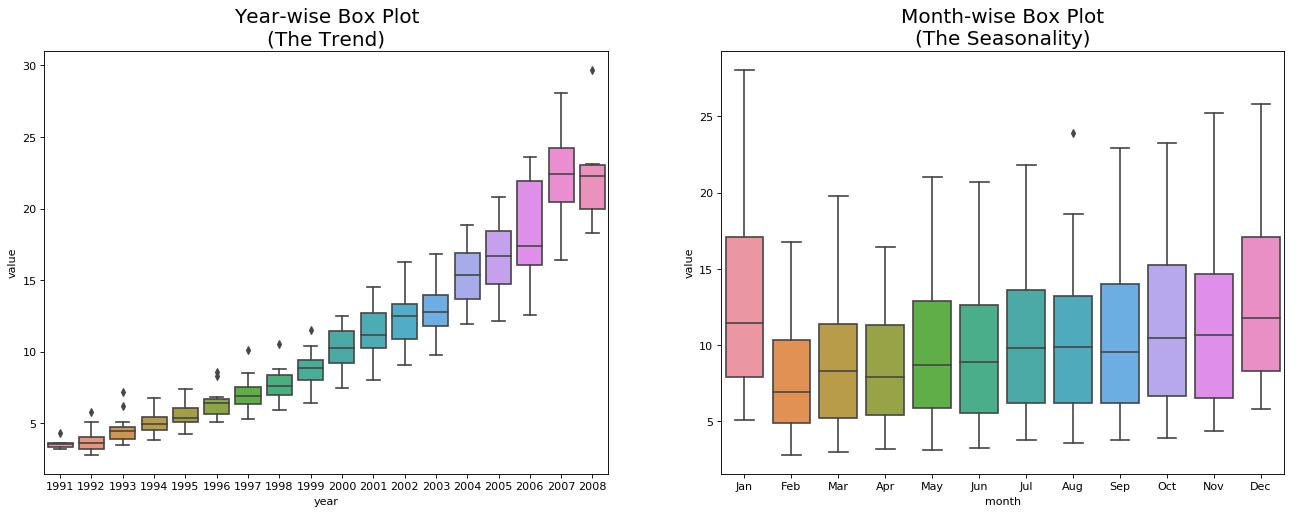

In [17]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 7), dpi=80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title("Year-wise Box Plot\n(The Trend)", fontsize=18)
axes[1].set_title("Month-wise Box Plot\n(The Seasonality)", fontsize=18)

plt.show()

box plot은 1년 그리고 1개월마다의 분포를 뚜렷하게 보인다. 또한 월별 box plot에서는 12월과 1월은 분명하게 마약 판매량이 더 높으며, 이는 휴가 할인 시즌에 기인한다고 볼 수 있다.

지금까지 우리는 그 패턴을 식별하는 유사점을 보았다. 자, 어떻게 하면 일반적인 패턴의 편차를 알아낼 수 있을까?

<br>
<a id="5"></a>

# 5. 시계열의 패턴

모든 시계열은 다음과 같은 요소들로 분리할 수 있다.

$
기초 레벨(Base Level) + 추세(Trend) + 계절성(Seasonality) + 에러(Error)
$

추세(Trend)는 시계열에서 관찰되는 기울기가 증가하거나 감소할 때 관찰된다. 반면 계절성(Seasonality)은 계절적 요인에 의한 규칙적인 주기들 사이에서 뚜렷하게 반복되는 패턴이 나타날 때 관찰된다. 이때의 주기는 년, 월, 일, 주, 심지어 시간이 될 수 있다.

하지만, 모든 시계열이 추세와 계절성을 가진다는 것이 의무적인 것은 아니다. 시계열은 뚜렷한 추세가 없지만 계절성을 가질 수 있다. 반대 상황 또한 나타날 수 있다.

그래서, 시계열은 추세, 계절성 그리고 에러 항의 조합으로 생각할 수 있다.

In [18]:
df1 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date')
df2 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date')
df3 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date')

In [19]:
df1.head() # guinearice

,value
date,
1970-01-01,0.311405
1971-01-01,0.325180
1972-01-01,0.339565
1973-01-01,0.354580
1974-01-01,0.370265


In [20]:
df2.head() # sunspotarea

,value
date,
1875-01-01,213.133333
1876-01-01,109.283333
1877-01-01,92.858333
1878-01-01,22.216667
1879-01-01,36.333333


In [21]:
df3.head() # AirPassengers

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


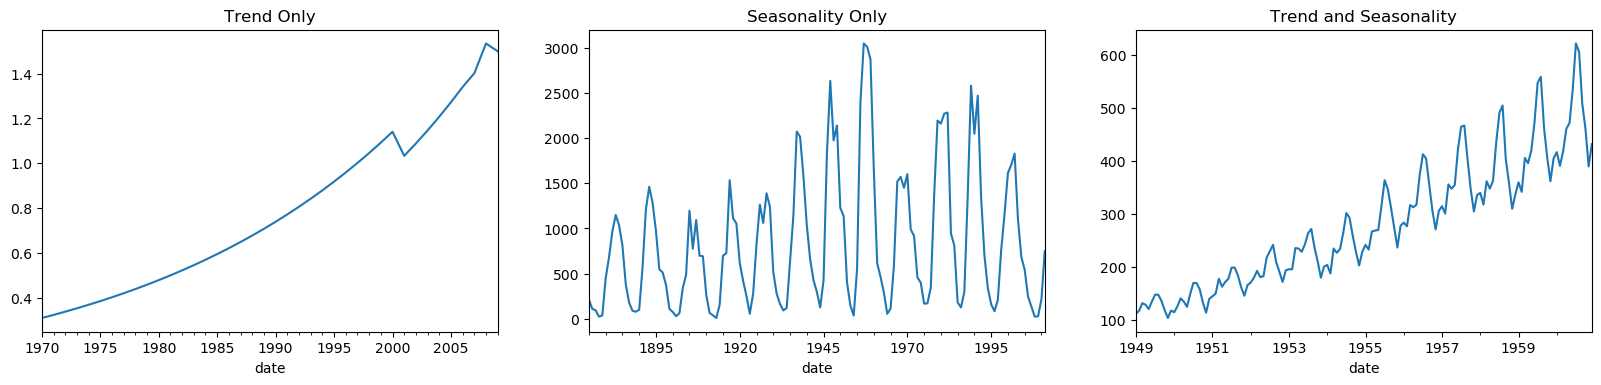

In [22]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)

df1.plot(title="Trend Only", legend=False, ax=axes[0])
df2.plot(title="Seasonality Only", legend=False, ax=axes[1])
df3.plot(title="Trend and Seasonality", legend=False, ax=axes[2])

plt.show()

고려해야 할 또 다른 면은 **순환 행동(Cyclic behaviour)** 이다. 그것은 시계열에서의 상승과 하락 패턴이 고정된 달력 기반의 주기 안에서 일어나지 않을 때 발생한다. "순환(Cyclic)" 효과와 "계절적(Seasonal)" 효과를 혼동하지 않도록 주의해야 한다.

그러면, 순환(Cyclic) 패턴과 계절적(Seasonal) 패턴 사이의 차이는 무엇일까?

만약 패턴이 고정된 달력 기반 주기가 아니라면, 그것은 순환이다. 왜냐하면 계절성과는 달리 순환 효과는 전형적으로 사업과 다른 사회경제적 요인에 의해 영향을 받기 때문이다.

<br>
<a id="6"></a>

# 6. 시계열 데이터 더하기 및 곱하기

추세와 계절성의 특성에 따라 시계열을 더하거나 곱함으로서 모델링을 할 수 있다. 여기서, 시계열의 각 관측치는 구성 요소의 합 또는 곱으로 표현될 수 있다.

**Additive time series:**
$
Value = Base \; Level + Trend + Seasonality + Error
$

**Multiplicative Time Series:**
$
Value = Base \; Level \times Trend \times Seasonality \times Error
$

<br>
<a id="7"></a>

# 7. 시계열을 구성요소(components)로 분해(decompose)하는 방법

시리즈를 기초 레벨(base level), 추세(trend), 계절성(seasonal)의 인덱스와 잔차(residual)의 덧셈 또는 곱셈의 조합으로서 생각함으로서 시계열의 전통적인 분해를 할 수 있다.

`statsmodels`의 `seasonal_decompose`로 실행할 수 있다.

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [24]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [25]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(df['value'],
                                model='multiplicative',
                                extrapolate_trend='freq')

In [26]:
# Additive Decomposition
result_add = seasonal_decompose(df['value'],
                                model='additive',
                                extrapolate_trend='freq')

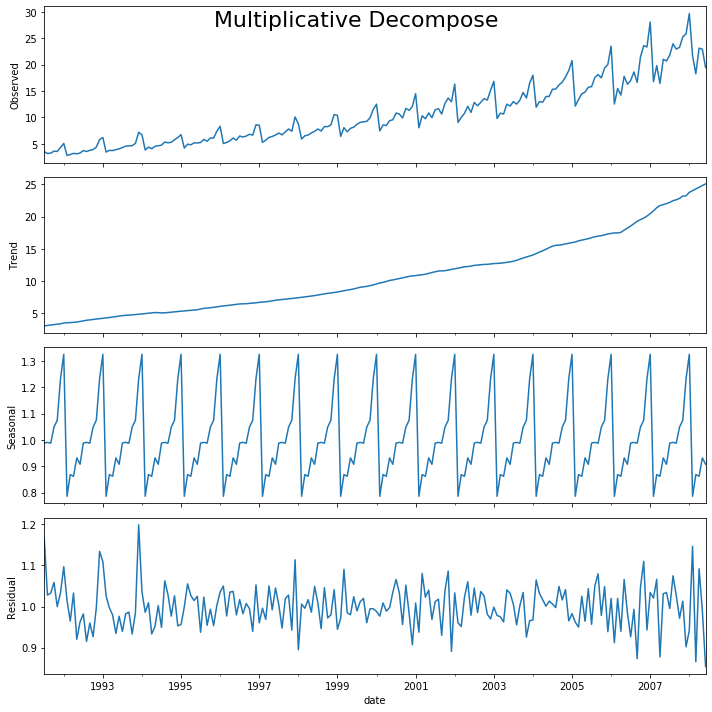

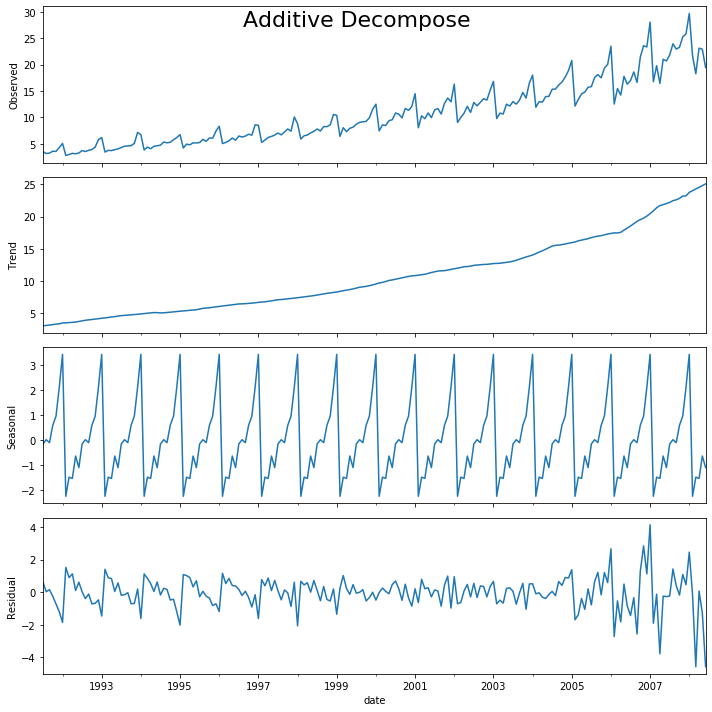

In [27]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})

result_mul.plot().suptitle('Multiplicative Decompose',
                           fontsize=22)
result_add.plot().suptitle('Additive Decompose',
                           fontsize=22)

plt.show()

`extrapolate_trend='freq'`를 설정하면 추세의 결측값과 시리즈의 시작 부분의 잔차가 처리된다.

덧셈 분해의 잔차를 살펴보면 패턴을 확인할 수 있다. 곱셈 분해는 꽤 무작위적으로 보인다. 이는 이상적인 것으로 곱셈 분해는 이 특정 시리즈에 대해서는 선호되어야 한다.

추세, 계절성, 잔차 요소의 수치형 출력(output)들은 `result_mul` 에 각각의 이름으로 저장된다. 이를 추출하여 데이터프레임에 저장해보자.

In [28]:
# Extract the Components ----
# Atucal Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal,
                              result_mul.trend,
                              result_mul.resid,
                              result_mul.observed],
                             axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


`seas`, `trend`, `resid` 컬럼의 각각의 값을 곱하면 `actual_values` 컬럼의 값과 일치하는 것을 확인할 수 있다.

In [29]:
print(df_reconstructed.loc['1991-07-01','seas'] *
      df_reconstructed.loc['1991-07-01','trend'] *
      df_reconstructed.loc['1991-07-01','resid'])
print(df_reconstructed.loc['1991-07-01','actual_values'])

3.5265910000000003
3.5265910000000003


<br>
<a id="8"></a>

# 8. 정상(stationary) & 비정상(non-stationary) 시계열

정상성(Stationarity)은 시계열의 속성(property)이다. 정상 시계열은 시계열의 값이 시간의 함수가 아닌 것을 의미한다.

즉, 평균, 분산 및 자기상관(autocorrelation)과 같은 통계적 속성들은 시간의 흐름에 따라 변화한다. 시리즈의 자기상관은 앞으로 나올 값에 대한 이전 값과의 상관 관계일 뿐이다.

정상 시계열은 계절성의 영향 또한 없다.

그러면 시리즈가 정상인지 아닌 지는 어떻게 식별할까? 이를 명확하게 하는 몇 가지 예제 그림을 살펴보자.

<img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series.png"/>

위의 이미지는 R의 `TStutorial`에서 확인할 수 있다.

그렇다면 정상 시계열은 왜 중요할까? 왜 이것에 대해 이야기하는 것일까?

잠시 후에 그 문제에 대해 이야기하겠지만, 적절한 변환을 적용하여 거의 모든 시계열을 정상 시계열로 만드는 것이 가능하다는 것을 이해해야 한다. 대부분의 통계적 예측 방법은 정상 시계열에서 작동하도록 설계되어 있다. 예측 과정의 첫 번째 과정은 전형적으로 비정상 시계열을 정상 시계열로 변환하는 것이다.

<br>
<a id="9"></a>

# 9. 정상 시계열 만드는 방법

다음과 같은 방법으로 정상 시계열을 만들 수 있다.

1. 시리즈 차분(Differencing) \[1차 또는 그 이상\]
2. 시리즈에 로그를 취함
3. 시리즈에 n 제곱근을 취함
4. 위의 방법들의 조합

시리즈를 정상화하는 가장 흔하고 간편한 방법은 시리즈를 대략적으로 정상성을 보일 때 까지 적어도 한 번 이상 차분하는 것이다.

그렇다면 차분이란 무엇일까?

만약 $Y_t$ 가 시점 $t$에서의 값이면, $Y = Y_t - Y_{t-1}$가 1차 차분이 된다. 간단히 말해 시리즈를 차분하는 것은 다음 값($Y_t$)을 현재 값($Y_{t-1}$)에서 빼는 것에 불과하다.

만약 1차 차분을 통해 정상 시계열을 만들지 못한 다면, 2차 차분을 진행하면 된다.

예를 들어 아래와 같은 시리즈가 있다고 생각해 보자.

`[1, 5, 2, 12, 20]`

1차 차분은 다음과 같다.

`[5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]`

2차 차분은 다음과 같다.

`[-3-4, 10-(-3), 8-10] = [-7, 13, -2]`

<br>

## 9.1 예측 전에 비정상 시계열을 정상 시계열로 만드는 이유

정상 시계열을 예측하는 것은 비교적 쉽고 예측 결과를 좀 더 신뢰할 수 있다.

한가지 중요한 이유는 자기회귀 예측 모형(autoregressive forecasting models)은 기본적으로 시계열 자체의 시차(lag(s))를 예측 변수로 활용하는 [선형 회귀 모형](https://www.machinelearningplus.com/machine-learning/complete-introduction-linear-regression-r/) 이라는 것이다.

예측 변수(X 변수)들이 서로 상관 관계가 없는 경우 선형 회귀 분석이 가장 효과적이라는 것을 알고 있다. 따라서, 시계열을 정상화하면 반복적인 자기 상관 관계가 제거되어 예측 모델의 예측 변수(시계열의 시차(lag))가 거의 독립적이 되기 때문에 이 문제가 해결된다.

이제 시계열을 정상화하는 것이 중요하다는 것을 확인했다. 그렇다면 주어진 시계열이 정상성을 띄는 지 아닌지를 어떻게 확인할 수 있을까?

<br>
<a id="10"></a>

# 10. 정상성을 검정하는 방법

시계열의 정상성은 이전에 했던 것 처럼 시계열을 시각화함으로서 정해질 수 있다.

또 다른 방법은 시계열을 2개 이상의 연속적인 부분으로 분할하고 평균, 분산 및 자기 상관과 같은 요약 통계량을 계산하는 것이다. 통계량이 상당히 다르다면 정상 시계열이 아닐 가능성이 크다.

그럼에도 불구하고 주어진 시계열이 정상성을 나타내는 지 아닌 지를 정량적으로 확인하는 방법이 필요하다. 이 작업은 **'단위근 검정(Unit Root Tests)'** 이라고 불리는 통계적 검정 방법을 사용해 수행할 수 있다. 이것은 시계열이 비정상적인지와 단위근을 가지고 있는 지를 확인하는 여러 가지의 변형된 방법이 있다.

단위근 검정에는 다음과 같은 여러 가지 방법이 있다.

1. Augmented Dickey Fuller test (ADF Test)
2. Kwiatkowski-Philips-Schmidt-Shin - KPSS test (trend stationary)
3. Philips Perron test (PP Test)

가장 일반적으로 사용되는 방법은 ADF 검정이다. 여기서 귀무 가설(Null hypothesis)은 시계열이 단위근을 가지고 있고 비정상 시계열이라는 것이다. 그래서 ADH 검정에서의 유의 확률(P-Value)은 유의 수준(significance level, 0.05) 보다 작아야 하고, 이때 귀무 가설을 기각할 수 있다.

반면 KPSS 검정의 경우 추세 정상성을 확인하는 데 사욛된다. 귀무 가설과 유의 확률의 해석은 ADF 검정과 반대이다. 아래의 코드는 파이썬의 `statsmodels` 패키지를 사용해 이 2가지 검정을 구현한다.

In [30]:
from statsmodels.tsa.stattools import adfuller, kpss

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [31]:
# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}') # 통계량
print(f'p-value: {result[1]}') # 유의 확률
for key, value in result[4].items():
    print('Critial Values:') # 임계값
    print(f'   {key}, {value}')

ADF Statistic: 3.145185689306738
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


In [32]:
# KPSS Test
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0]) # 통계량
print('p-value: %f' % result[1]) # 유의 확률
for key, value in result[3].items():
    print('Critial Values:') # 임계치
    print(f'   {key}, {value}')


KPSS Statistic: 1.313675
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<br>
<a id="11"></a>

# 11. 백색잡음(white noise)과 정상 시계열의 차이점

정상 시계열과 같이 백색 잡음(white noise) 또한 시간의 함수가 아니기 때문에 백색 잡음의 평균과 분산은 시간이 지남에 따라 변하지 않는다. 그러나 이 둘의 차이점은 백색 잡음의 평균이 0으로 완전히 무작위라는 것이다.

백색 잡음에는 패턴이 전혀 없다. FM 라디오의 소리 신호를 시계열로 생각한다면, 채널 사이에 들리는 빈 소리가 바로 백색 잡음이다.

수학적으로,  평균 0을 가진 완전히 무작위적인 숫자의 시퀀스(sequence)가 백색 잡음이다.

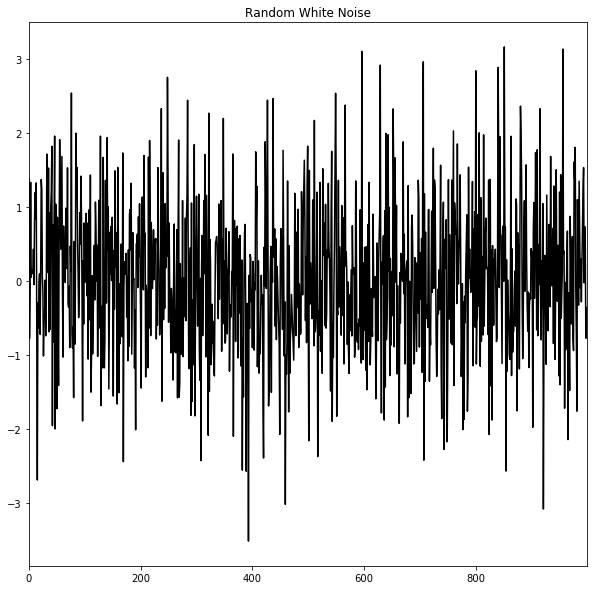

In [33]:
randvals = np.random.randn(1000)
pd.Series(randvals).plot(title="Random White Noise", color='k')
plt.show()

<br>
<a id="12"></a>

# 12. 시계열에서 추세 제거(detrend)하는 방법

시계열의 추세 제거는 시계열로부터 추세 요소를 제거하는 것이다. 그러나 어떻게 추세를 추출할 것인가? 여기에는 몇 가지 접근법이 있다.

1. 시계열로부터 제일 적합하는 선(line of best fit)을 뺀다. 이 제일 적합하는 선(line of best fit)은 시간 단계를 예측 변수(predictor)로 하는 선형 회귀 모형으로 부터 구할 수 있다. 보다 복잡한 추세를 위해서는 모형에 2차항(quadratic terms, $x^2$)을 사용할 수 있다.

2. 앞서 살펴봤던 시계열 분해를 통해 얻은 추세 요소를 뺀다.

3. 평균을 뺀다.

4. 이동 평균 추세선(moving average trend line)이나 순환 요소(cyclical components)를 제거하기 위해 아래와 같은 필터를 적용한다.
  - **Baxter-King 필터**(`statsmodels.tsa.filter.bkfilter`)
  - **Hodrick-Prescott 필터**(`statsmodels.tsa.filters.hpfilter`)
  
처음 2가지 방법을 구현해보자.

In [34]:
# Using scipy: Subtract the line of best fit
from scipy import signal
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [35]:
beforeDetrend = df.value.values
beforeDetrend[:5]

array([3.526591, 3.180891, 3.252221, 3.611003, 3.565869])

In [36]:
detrended = signal.detrend(df.value.values)
detrended[:5]

array([2.30256538, 1.86356091, 1.84158643, 2.10706396, 1.96862549])

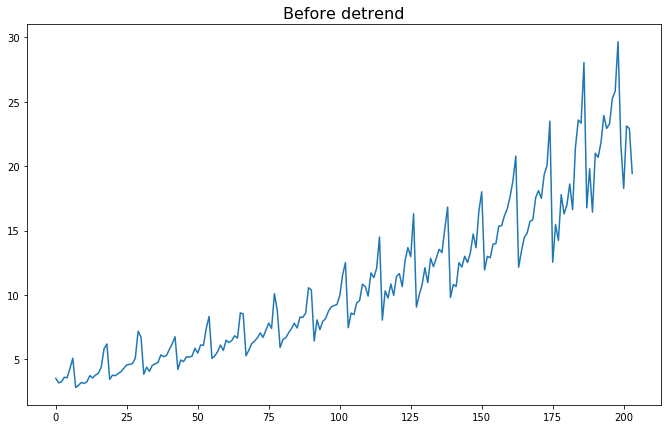

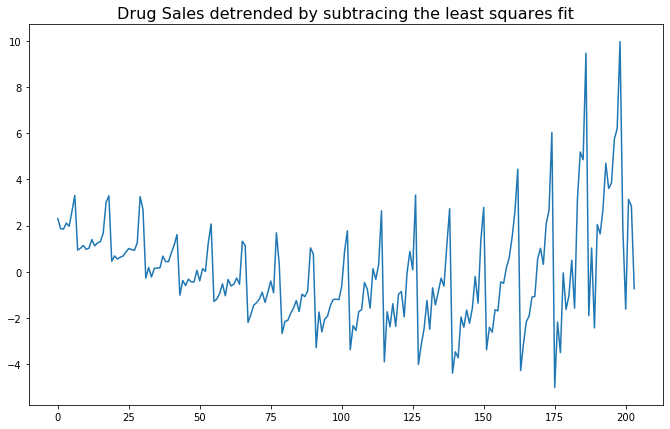

In [37]:
plt.figure(figsize=(25,7))
plt.subplot(121)

plt.plot(beforeDetrend)
plt.title('Before detrend', fontsize=16)
plt.show()

plt.figure(figsize=(25,7))
plt.subplot(122)

plt.plot(detrended)
plt.title('Drug Sales detrended by subtracing the least squares fit', fontsize=16)
plt.show()

In [38]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [39]:
beforeDetrend = df.value.values
print(beforeDetrend[:5])

result_mul = seasonal_decompose(df['value'], model='multiplicative',
                                extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend
print(detrended[:5].values)

[3.526591 3.180891 3.252221 3.611003 3.565869]
[0.4665058 0.0561259 0.062776  0.3568781 0.2470642]


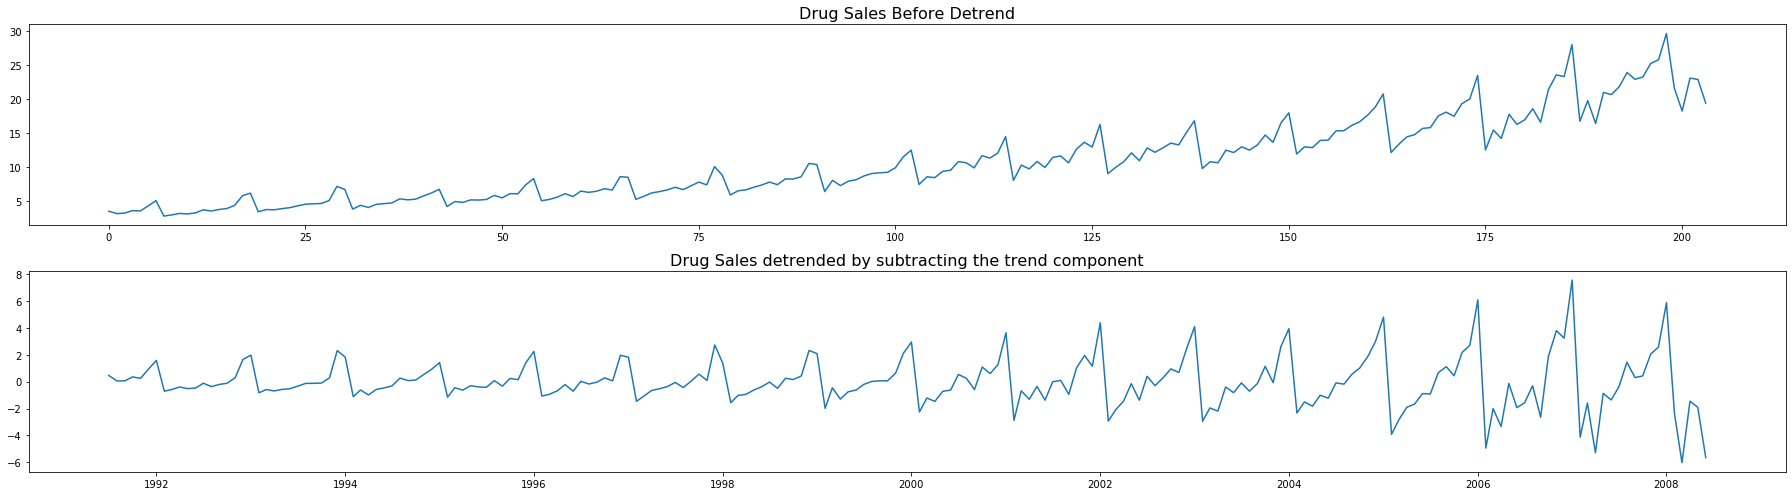

In [40]:
plt.figure(figsize=(25, 7))
plt.subplot(211)
g1 = plt.plot(beforeDetrend)
plt.title("Drug Sales Before Detrend", fontsize=16)

#plt.figure(figsize=(25, 7))
plt.subplot(212)
g2 = plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

plt.tight_layout()
plt.show()

<br>
<a id="13"></a>

# 13. 시계열에서 계절성 제거(deseasonalize)하는 방법

시계열의 **계절성을 제거(deseasonalize)**하는 방법 또한 여러 가지가 있다. 아래는 몇 가지 예이다.

1. 이동 평균과 길이를 계절적인 윈도우로 갖는다. 이 과정은 시계열을 연속적으로 부드럽게 할 것이다.
2. 시계열을 계절성 차분한다. (현재의 값에서 이전 값의 계절성 부분을 뺀다.)
3. STL 분해로 부터 얻은 계절성의 인덱스로 시계열을 나눈다.

계절성의 인덱스로 나누는 것이 잘 작동하지 않는다면 시계열의 로그를 취하는 것을 시도해보면 계절성이 제거된다. 나중에 지수를 취하면 원본 크기로 복원할 수 있다.

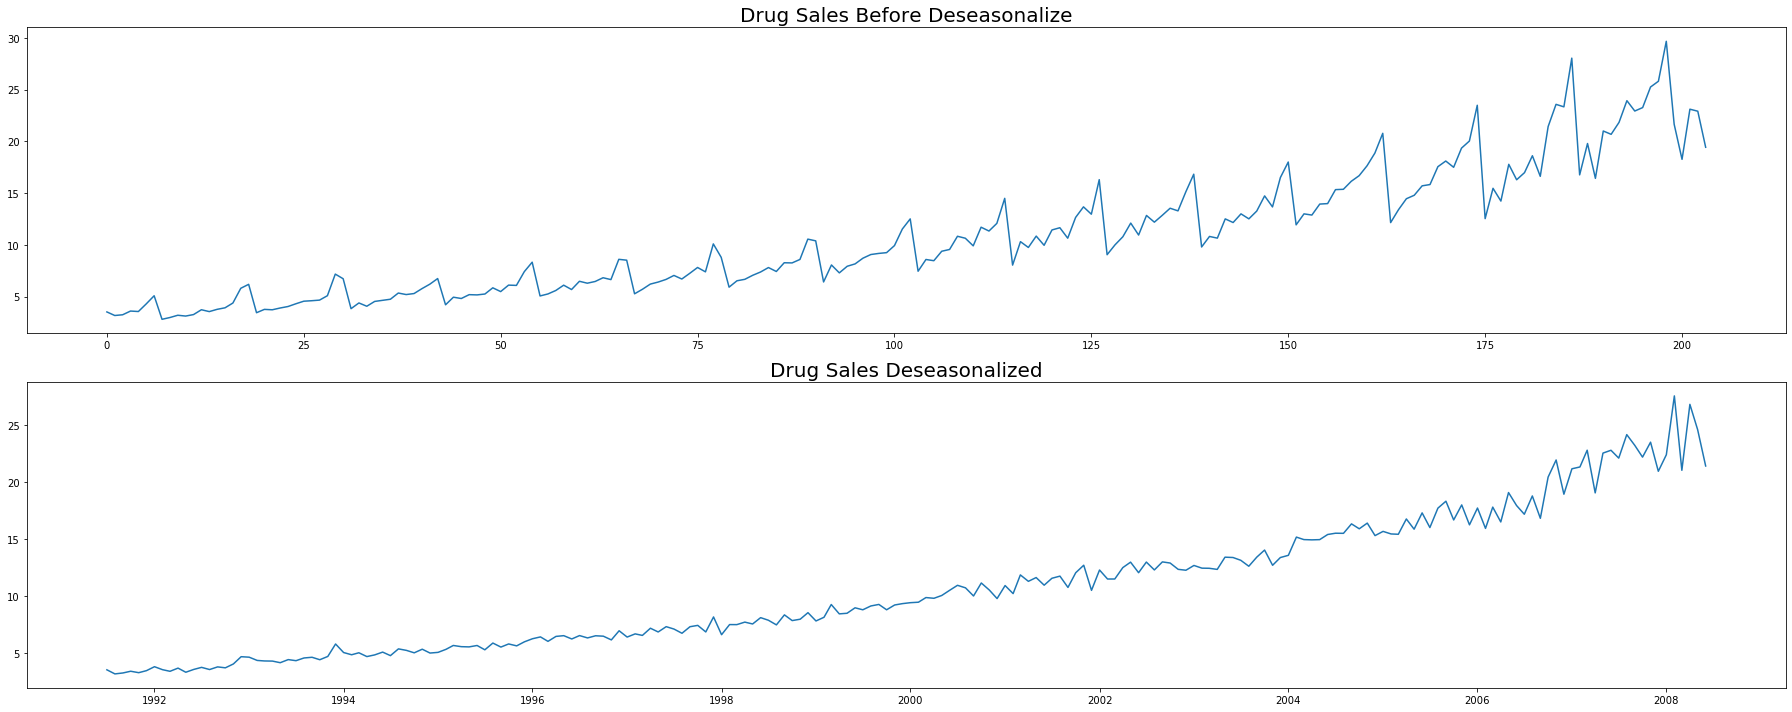

In [41]:
# 추세 요소 제거 (Subtracting the Trend Component)
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# 시계열 분해 (Time Series Decomposition)
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# 계절성 제거 (Deseasonalize)
beforeDeseasonalize = df.value.values
deseasonalized = df.value.values / result_mul.seasonal

# 시각화 (Plot)
plt.figure(figsize=(25, 10))

plt.subplot(211)
g1 = plt.plot(beforeDeseasonalize)
plt.title("Drug Sales Before Deseasonalize", fontsize=20)

plt.subplot(212)
g2 = plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=20)

plt.tight_layout()
plt.show()

<br>
<a id="14"></a>

# 14. 시계열의 계절성을 검정하는 방법

가장 흔한 방법은 시계열을 시각화하고 고정된 시간 구간안에서 반복되는 패턴을 확인하는 것이다. 그래서, 계절성의 유형은 시각 또는 달력에 의해 결정된다.

1. 하루 중 시간 (Hour of day)
2. 월 중 일 (Day of Month)
3. 주별 (Weekly)
4. 월별 (Monthly)
5. 년도별 (Yearly)

그러나, 계절성에 대한 명확한 검토를 원할 경우 자기 상관 함수(AutoCorrelation Function, ACF) 그래프를 사용한다. 다음 섹션에서 ACF에 대한 자세한 내용을 확인한다. 그러나 시계열에 강한 계절성 패턴이 있을 경우, ACF 그래프는 주로 다수의 계절성 창(seasonal window)의 꼭지점에서 반복해서 나타난다.

예를 들어, 약의 매출 시계열은 매년 반복된 패턴을 갖는 월별 시계열이다.그래서 각각 12번째, 24번째, 36번째 등에서 꼭지점을 확인할 수 있다.

실제 데이터셋에서는 이와 같은 강한 패턴이 거의 눈에 띄지 않고 어떤 잡음(noise)에도 왜곡될 수 있으므로 이러한 패턴을 포착하기 위해서는 세심한 주의가 필요하다.

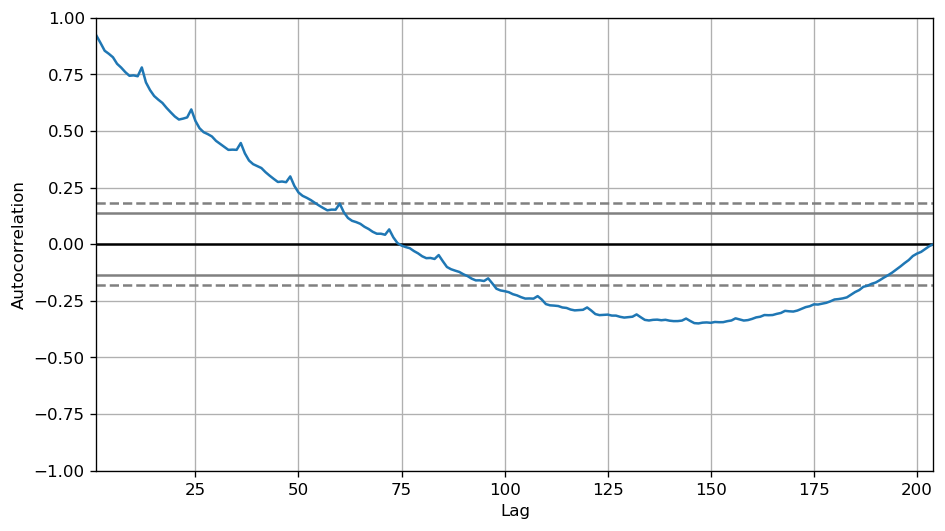

In [42]:
from pandas.plotting import autocorrelation_plot

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Draw Plot
plt.rcParams.update({'figure.figsize': (9, 5), 'figure.dpi': 120})
autocorrelation_plot(df.value.tolist())

다른 방법으로 통계적인 검정 방법을 원할 경우, [CHTest](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.CHTest.html#pmdarima.arima.CHTest)가 정상 시계열이 되기 위해 계절 차분이 필요한 지 결정할 수 있다.

<br>
<a id="15"></a>

# 15. 시계열 데이터의 결측값 다루는 방법

때때로, 시계열이 결측 일자/시간을 가질 수 있다. 이는 데이터가 포착되지 않았거나 해당 기간 동안 사용이 불가한다는 것을 의미한다. 이는 해당 일자의 측정치가 0일 때 발생할 수 있고 이 경우에는 해당 기간을 0으로 채울 수 있다.

두 번째로, 시계열에 대해서는 특히 시계열이 정상 시계열이 아닐 경우에는 결측값을 시계열의 평균값으로 대체할 수 없다. 대신 빠르고 지저분한 해결책으로는 앞 부분의 값을 이전의 값으로 채우는 것을 할 수 있다.

그러나, 시계열의 성격(nature)에 따라 결론을 내리기 전에 여러 가지 접근 방식을 시도해 보고 싶을 수 있다. 몇 가지 효과적인 대안은 다음과 같다.

- 뒷방향 채우기 (Backward Fill)
- 선형보간법 (linear Interpolation)
- 2차보간법(?) (Quadratic Interpolation)
- 최근접 이웃의 평균 (Mean of nearest neighbors)
- 계절적 상대의 평균(?) (Mean of seasonal counterparts)

imputation 성능을 측정하기 위해, 시계열에 결측값을 수동으로 도입하고, 위의 접근법으로 impute된 값의 평균 제곱 오차(mean squared error, MSE)를 실제 값에 대해 측정한다.

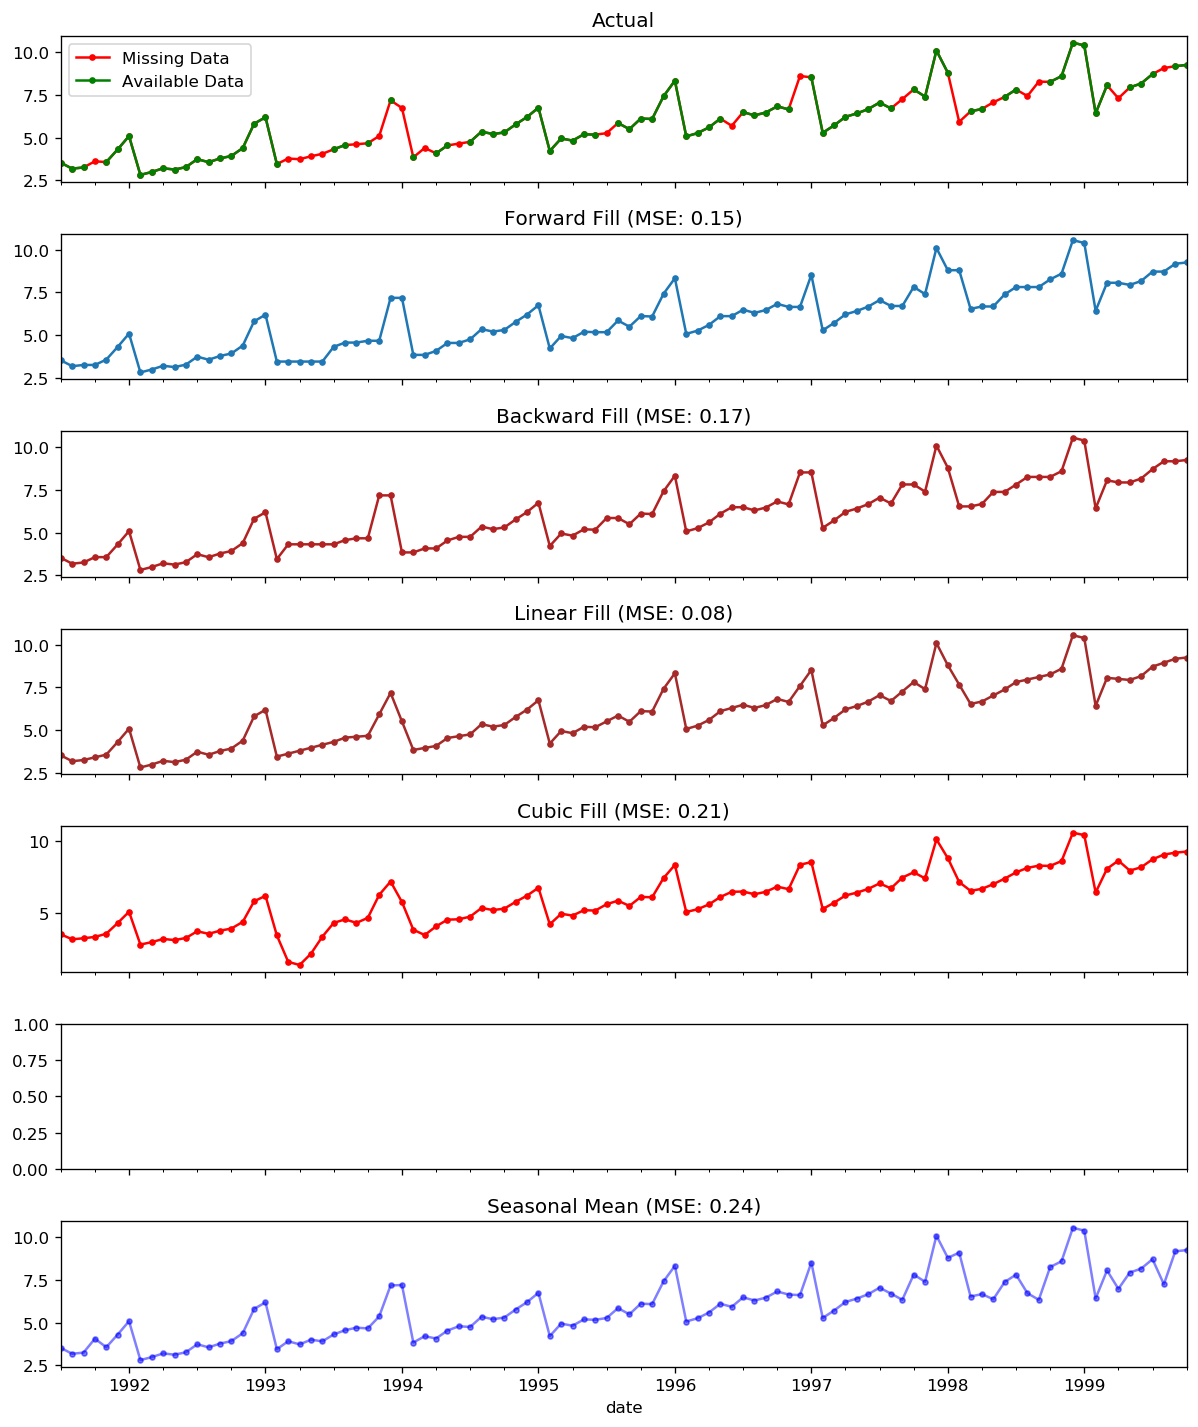

In [43]:
# 데이터셋 생성 (Generate dataset)
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date').head(100)

#df = pd.read_csv('datasets/a10_missings.csv', parse_dates=['date'], index_col='date')
subIndex = pd.to_datetime(np.sort(np.random.choice(df_orig.index, size=20, replace=False)))
df = df_orig.copy()
df.loc[subIndex,'value'] = np.NaN

fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))

## 1. Actual --------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +')',
                       ax=axes[1],
                       label='Forward Fill', style='.-')

## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) + ")",
                       ax=axes[2],
                       label='Back Fill',
                       color='firebrick',
                       style='.-')

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset=['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) + ")",
                       ax=axes[3],
                       label='Cubic Fill', color='brown', style='.-')

## 5. Cubic Interpolation -------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], 
                      label='Cubic Fill', color='red', style=".-")

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ---
# def knn_mean(ts, n):
#     out = np.copy(ts)
#     for i, val in enumerate(ts):
#         if np.isnan(val):
#             n_by_2 = int(np.ceil(n/2))
#             print(n_by_2)
#             lower = np.max([0, int(i - n_by_2)])
#             upper = np.min([len(ts)+1, int(i + n_by_2)])
#             ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
#             out[i] = np.nanmean(ts_near)
#     return out

# df['knn_mean'] = knn_mean(df.value.values, 8)
# error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
# df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], 
#                     label='KNN Mean', color='tomato', alpha=0.5, style=".-")

## 7. Seasonal Mean ------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corrsponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n] # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]]) # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
            
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], 
                         label='Seasonal Mean', color='blue', alpha=0.5, style=".-")

plt.tight_layout()
plt.show()

또한 imputations이 얼마나 정확한 지를 원하는 가에 따라 다음과 같은 접근법을 고려할수 있다.

1. 설명 변수(explanatory variables)가 있는 경우, 랜덤 포레스트 또는 k최근접 이웃과 같은 예측 모델을 사용하여 예측한다.
2. 충분한 과거 관측치가 있는 경우, 결측값을 예측(forecast)한다.
3. 충분한 미래 관측치가 있는 경우, 결측값을 역추적(backcast)한다.
4. 이전 순환(cycle)을 통한 상대 예측

<br>
<a id="16"></a>

# 16. 자기상관함수(autocorrelation function)와 부분자기상관함수(partial autocorrelation function)

자기상관(Autocorrelation)은 간단히 말해 시계열 자신의 시차(lag)들의 상관관게이다. 만약 시계열이 상당히 자기상관되어 있다면, 이는 시계열의 이전 값(시차)이 현재 값을 예측하는 데 유용하다는 것을 의미한다.

부분 자기상관(Partial Autocorrelation) 또한 비슷한 정보를 전달하지만 중간 시차(lag)에서 상관 관계 기여를 제외하고 시계열과 시차(lag)의 순수한 상관관계를 전달한다.

In [44]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Calculate ACF and PACF upto 50 logs
acf_50 = acf(df.value, nlags=50)
pacf_50 = pacf(df.value, nlags=50) 
print(acf_50)
print(pacf_50)

[1.         0.92056815 0.88782519 0.85385862 0.84052841 0.82523769
 0.79629658 0.77950157 0.75953251 0.74337588 0.74521347 0.74134847
 0.78031252 0.71424686 0.68014097 0.65401657 0.63791893 0.62349882
 0.60171747 0.58230335 0.5638103  0.5502367  0.55428812 0.55963579
 0.5948865  0.5443742  0.5118496  0.49425977 0.48585482 0.47551253
 0.45600656 0.44259219 0.42927946 0.416305   0.4173017  0.41648248
 0.44663227 0.40084543 0.36925858 0.35321116 0.34468629 0.33615309
 0.31790639 0.30248802 0.2882186  0.27463544 0.2766393  0.27364256
 0.29913888 0.25730382 0.22818248]
[ 1.00000000e+00  9.25102966e-01  2.82971065e-01  7.59757971e-02
  1.69214944e-01  9.37032442e-02 -6.39607472e-02  5.60043953e-02
  1.65088238e-02  4.31903979e-03  1.74967636e-01  8.74246693e-02
  4.16356229e-01 -6.36840131e-01 -1.52234343e-01  1.03379843e-01
 -1.02461781e-01  4.61991378e-02  2.63314924e-01 -6.44713103e-02
 -5.88150504e-02  7.18477473e-02  6.52357282e-03  1.94410602e-01
  5.96935698e-02 -2.75013916e-01 -1.103

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


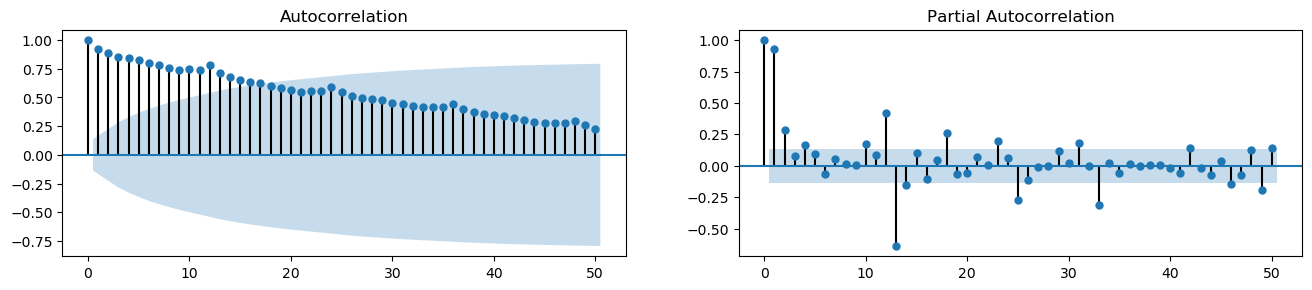

In [45]:
# Draw Plot
fig, axes = plt.subplots(1,2, figsize=(16, 3), dpi=100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])
plt.show()

<br>
<a id="17"></a>

# 17. 부분자기상관함수 계산하는 방법

그렇다면 어떻게 부분 자기상관계수를 계산할 수 있을까?

시계열의 lag(k)의 부분 자기상관계수는 $Y$의 자기회귀(AutoRegressive, AR) 방정식에 있는 시차(lag)의 계수(coefficient)이다. $Y$의 자기회귀 방정식은 예측 변수(predictors)로서 자기 자신의 시차(lags)를 갖는 선형 회귀에 지나지 않는다.

예르 들어, 만약 $Y_t$가 현재 시계열이고 $Y_{t-1}$이 $Y$의 시차 1 이라고 하면, 시차 3의 부분 자기상관계수($Y_{t-3}$)는 아래의 방정식에서의 $Y_{t-3}$의 $\alpha_3$ 계수(coefficient)이다.

<img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/12_5_Autoregression_Equation-min.png"/>

<br>
<a id="18"></a>

# 18. Lag 그래프

시차 그래프는 시계열 자신의 시차에 대한 시계열의 산점도 그래프이다. 이는 주로 자기상관을 확인하는 데 사용된다. 만약 아래에서 보이는 것과 같이 시계열에 어떤 패턴이 존재한다면, 시계열은 자기상관되어 있다. 만약 어떤 패턴도 없다면, 시계열은 무작위 백색 잡음(random white noise)일 것이다.

아래의 Sunspots area 시계열의 예제에서, n_lag가 증가할수록 그래프들은 점점 산발적으로 존재하게 된다.

In [46]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

In [47]:
ss.head()

,date,value
0,1875-01-01,213.133333
1,1876-01-01,109.283333
2,1877-01-01,92.858333
3,1878-01-01,22.216667
4,1879-01-01,36.333333


In [48]:
a10.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


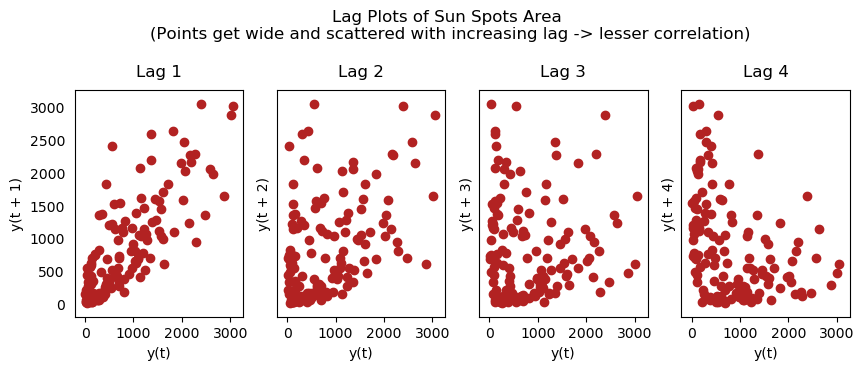

In [49]:
# Plot
fig, axes = plt.subplots(1, 4, figsize=(10, 3), sharex=True, sharey=True, dpi=100)

for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))
    
fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

plt.show()

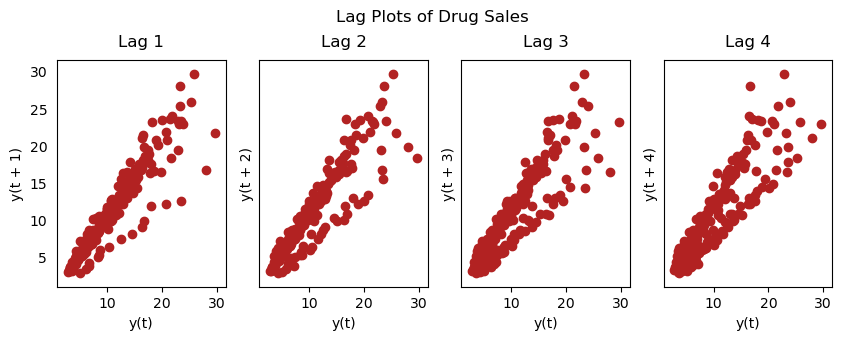

In [50]:
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)

for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))
    
fig.suptitle('Lag Plots of Drug Sales', y=1.05)
plt.show()

<br>
<a id="19"></a>

# 19. 시계열의 예측가능성(forecastability)을 제거하는 방법

시계열이 더 규칙적이고 반복 가능한 패턴을 가질수록 예측하기가 더 쉽다. **근사 엔트로피(Approximate Entropy)**는 시계열 변동의 정규성과 예측 불가능한 가능성을 정량화하는 데 사용할 수 있다.

근사 엔트로피가 높을수록 예측하기가 더 어려워진다.

더 좋은 대안으로는 샘플 엔트로피(Sample Entropy)가 있다.

샘플 엔트로피는 근사 엔트로피와 유사하지만 더 작은 시계열에서도 복잡성을 추정하는 데 더 일관적이다. 예를 들어, 적은 수의 데이터 포인트를 갖고 있는 무작위 시계열은 더 일반적인(regular) 시계열보다 '근사 엔트로피'가 낮을 수 있지만, 더 길이가 긴(longer) 무작위 시계열에서는 더 높은 '근사 엔트로피'를 가질 수 있다.

샘플 엔트로피는 문제를 잘 다룬다. 아래에서 이를 증명하는 것을 보자.

In [51]:
# https://en.wikipedia.org/wiki/Approximate_entropy
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

In [52]:
ss.head()

,date,value
0,1875-01-01,213.133333
1,1876-01-01,109.283333
2,1877-01-01,92.858333
3,1878-01-01,22.216667
4,1879-01-01,36.333333


In [53]:
a10.head() 

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [54]:
rand_small = np.random.randint(0, 100, size=36)
rand_small

array([64, 83, 60, 50, 60, 11, 71, 11, 94,  2, 74, 43, 37, 50,  7, 20, 84,
        2,  9, 28, 75, 39, 53, 41, 53,  3, 81, 52,  8, 62, 68, 44, 45, 83,
       48, 73])

In [56]:
rand_big = np.random.randint(0, 100, size=136)
rand_big

array([ 0, 69, 17, 33, 30, 72, 87, 62, 15, 75, 19, 90,  0, 91, 61, 38, 36,
       99,  9, 47, 36, 12, 94,  2, 88, 17, 82, 12, 63, 40, 80, 27, 39, 25,
       66, 80, 50, 42, 51, 13, 21, 32, 21, 91, 41, 97, 54, 37, 35, 69, 64,
       75, 70, 74,  4, 41, 18, 70, 23, 75, 60, 56, 75, 33, 66, 68, 66, 65,
       96, 72, 66, 41,  8, 54, 14, 25,  5, 64, 47, 25, 69, 56, 72,  3, 50,
       56, 96, 82, 57, 74, 74, 10, 11, 12, 62, 31, 34,  9, 40, 79, 68, 40,
       86, 72, 94, 30, 26,  2, 91, 27, 55, 54, 90, 46, 28, 43, 57, 63, 63,
       45, 36, 27, 19, 12, 51, 57,  5, 33, 89, 39, 21, 97,  9, 81,  1,  9])

In [57]:
def ApEn(U, m, r):
    """Compute Approximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])
    
    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))
    
    N = len(U)
    return abs(_phi(m+1) - _phi(m))

In [58]:
print(ApEn(ss.value, m=2, r=0.2*np.std(ss.value))) # 0.651

0.6514704970333534


In [59]:
print(ApEn(a10.value, m=2, r=0.2*np.std(a10.value))) # 0.537

0.5374775224973489


In [60]:
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) # 0.197

0.1977894554000703


In [61]:
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big))) # 0.611

0.611005235589265


In [62]:
# https://en.wikipedia.org/wiki/Sample_entropy
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])
    
    def _phi(m):
        x = [[U[j] for j in range(i, i+m-1+1)] for i in range(N-m+1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)
    
    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

In [63]:
print(SampEn(ss.value, m=2, r=0.2*np.std(ss.value))) # 0.78

0.7853311366380039


In [64]:
print(SampEn(a10.value, m=2, r=0.2*np.std(a10.value))) # 0.41

0.41887013457621214


In [65]:
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small))) # 2.07

2.0794415416798357


In [66]:
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big))) # 2.61

2.6149597780361984


<br>
<a id="20"></a>

# 20. 시계열을 평활화(smoothen)하는 이유와 방법

시계열을 평활화(Smoothening)하는 것은 다음과 같은 경우에 유용하다.

- 신호(signal)에서 잡음(noise)의 영향을 줄이면 잡음이 필터된(noise-filtered) 시계열의 근사치(approximation)를 얻을 수 있다.

- 시계열의 부드러운 버전은 원래의 시계열 자체를 설명하는 데 사용되는 특성이 될 수 있다.

- 근본적인(underlying) 추세를 잘 시각화할 수 있다.

그렇다면, 시계열을 어떻게 평활화할 수 있을까? 다음과 같은 방법들을 이야기해보자.

1. 이동 평균(moving average)을 취함
2. LOESS 평활화를 실시 (지역화된 회귀)
3. LOWESS 평활화를 실시 (지역적으로 가중치가 부여된 회귀)

이동 평균(moving average)은 정의된 폭의 규칙적인 단계로 이루어진(rolling) 윈도우(window)의 평균에 불과하다. 그러나 윈도우의 폭을 현명하게 선택해야 한다. 왜냐하면 큰 윈도우의 크기는 시계열을 지나치게 부드럽게 만들 것이기 때문이다. 예를 들어 윈도우의 사이즈가 계절성 기간(ex. 월 크기의 시계열에서의 12개)과 동일하다면 계절적 효과가 효과적으로 무효화(nullify)된다.

'LOcalized regrESSion'의 약자인 LOESS는 각각의 포인트의 지역적인 이웃의 다중 회귀에 적합하다. 이것은 회귀 모형에 적합하다고 간주되야 하는 근처에 있는 데이터 포인트의 비율을 명시하는 `frac` 인수(argument)를 이용하여 평활화 단위를 조절할 수 있는 `statsmodels` 패키지에 의해 구현된다.

In [75]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom': False,
                     'axes.titlepad': 5})

# Import
df_orig = pd.read_csv('datasets/elecequip.csv', 
                      parse_dates=['Index'],
                      index_col='Index')
df_orig.head()

,x
Index,
1996-01-01,79.35
1996-01-01,75.78
1996-01-01,86.32
1996-01-01,72.60
1996-01-01,74.86


In [76]:
# 1. Moving Average
df_ma = df_orig.x.rolling(3, center=True, closed='both').mean()
df_ma

Index
1996-01-01          NaN
1996-01-01    80.483333
1996-01-01    78.233333
1996-01-01    77.926667
1996-01-01    77.090000
                ...    
2011-01-01    94.493333
2011-01-01    92.716667
2012-01-01    89.940000
2012-01-01    89.760000
2012-01-01          NaN
Name: x, Length: 195, dtype: float64

In [77]:
# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.x,
                                 np.arange(len(df_orig.x)),
                                 frac=0.05)[:,1],
                          index=df_orig.index,
                          columns=['value'])
df_loess_5.head()

,value
Index,
1996-01-01,78.871709
1996-01-01,78.658168
1996-01-01,78.490323
1996-01-01,78.438303
1996-01-01,78.294112


In [78]:
df_loess_15 = pd.DataFrame(lowess(df_orig.x,
                                  np.arange(len(df_orig.x)),
                                  frac=0.15)[:,1],
                           index=df_orig.index,
                           columns=['value'])
df_loess_15.head()

,value
Index,
1996-01-01,77.490744
1996-01-01,77.898258
1996-01-01,78.306652
1996-01-01,78.715496
1996-01-01,79.123265


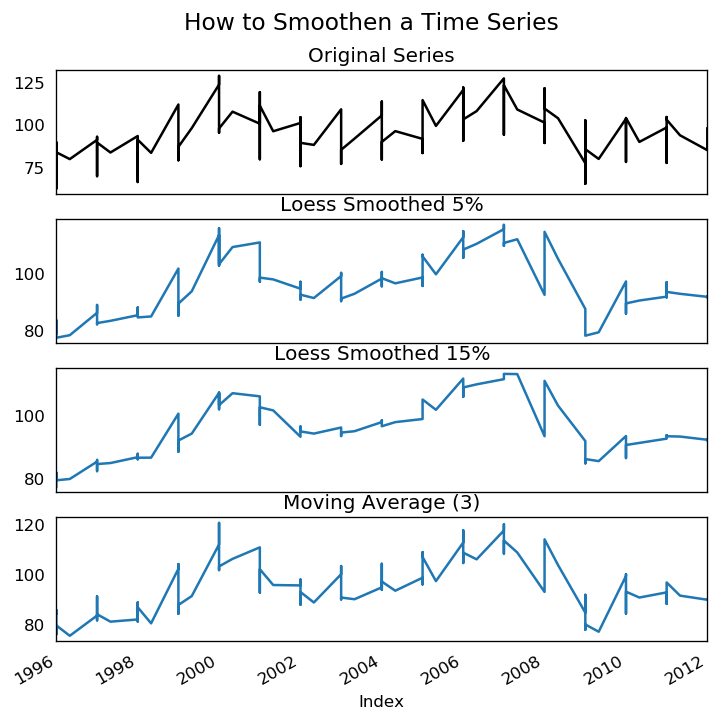

In [82]:
# Plot
fig, axes = plt.subplots(4,1, figsize=(7,7),
                         sharex=True, dpi=120)

df_orig['x'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series',
             y=0.95,
             fontsize=14)

plt.show()

<br>
<a id="21"></a>

# 21. 한 시계열이 다른 시계열을 예측하는 데 도움이 되는 지 확인하기 위해 그래인저 인과관계(Granger Causality) 검정을 하는 방법

그래인저 인과관계 검정(Granger causality test)은 하나의 시계열이 또 다른 시계열을 예측하는 데 유용한 지를 결정하는 데 사용된다.

그래인저 인과관계 검정은 어떻게 작동할까?

만약 $X$가 $Y$를 유발시키는 경우, $Y$의 이전 값과 $X$의 이전 값을 이용해 $Y$를 예측하는 것이 $Y$의 이전 값만을 사용해 $Y$를 예측하는 것보다 더 나은 결과를 내야 한다는 생각에 기초한다.

따라서 Y의 시차(lag of Y)가 Y를 야기시키는 지를 검정하는 데 그래인저 인과관계를 사용해서는 안된다는 점을 이해해야 한다. 대신 일반적으로 외부요인으로서의(Y의 시차가 아닌) 변수에만 사용된다.

이것은 `statsmodels` 패키지에 잘 구현되어 있다.

이것은 주요 인자로서 2개의 컬럼을 갖는 2D 배열을 인수로 받는다. 값들은 첫 번째 컬럼에 있고, 예측 변수 X는 두 번째 컬럼에 있다.

귀무 가설은 다음과 같다. 두 번째 컬럼에 있는 시계열은 첫 번째 컬럼에 있는 그래인저 시계열을 야기시키지 않는다. 유의 확률(p-value)들은 유의 수준(significance level, 0.05)보다 작으면 귀무 가설을 기각하고 X의 시차(lag)가 실제로 유용하다고 결론짓는다.

두 번째 인수 `maxlag`는 얼마나 많은 $Y$의 시차가 검정에 포함되어야 하는 지를 말한다.

In [84]:
from statsmodels.tsa.stattools import grangercausalitytests
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df['month'] = df.date.dt.month
df.head()

,date,value,month
0,1991-07-01,3.526591,7
1,1991-08-01,3.180891,8
2,1991-09-01,3.252221,9
3,1991-10-01,3.611003,10
4,1991-11-01,3.565869,11


In [85]:
grangercausalitytests(df[['value','month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1
ssr based chi2 test:   chi2=55.6014 , p=0.0000  , df=1
likelihood ratio test: chi2=49.1426 , p=0.0000  , df=1
parameter F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2
ssr based chi2 test:   chi2=333.6567, p=0.0000  , df=2
likelihood ratio test: chi2=196.9956, p=0.0000  , df=2
parameter F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2


{1: ({'ssr_ftest': (54.779674835573566, 3.6614258713531555e-12, 200.0, 1),
   'ssr_chi2test': (55.60136995810717, 8.876175235021637e-14, 1),
   'lrtest': (49.14260233004984, 2.38014300604565e-12, 1),
   'params_ftest': (54.77967483557358, 3.661425871353102e-12, 200.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (162.6989179987325, 1.913323508685587e-42, 197.0, 2),
   'ssr_chi2test': (333.65666432227374, 3.5267600881275606e-73, 2),
   'lrtest': (196.99559277182198, 1.6709003499115789e-43, 2),
   'params_ftest': (162.6989179987325, 1.913323508685587e-42, 197.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

위의 경우 유의 확률(p-value)는 모든 검정에 대해 0이다. 그래서 '월(Month)'은 실제로 항공 승객들을 예측하는 데 사용될 수 있다.

<br>
<a id="22"></a>

# 22. 다음은 무엇인가?

우리는 아주 기본적인 것에서부터 시작해 시계열의 다양한 특징들을 이해했다. 분석이 완료되면 다음 단계는 예측을 시작하는 것이다.

다음 포스트에서는 ARIMA를 이용하여 시계열 예측 모델을 만드는 심층적인 과정을 안내할 것이다.